# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
#heroes_df.index
heroes_df.drop(heroes_df.columns[0], axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [6]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Bradley,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
For cleaning null values: I first get utilize isna() on the entire DF to get a count of the number of observations that occur with null values.  The isna() breaks these counts down by attribute.  Then, for each attribute that contributes to a count > 0, I produce a subset of observations containing a null value for that specific attribute. If the ratio of observations is less than (or equal to) some predifined "acceptable loss" ratio threshold, then I drop those rows, otherwise I replace null values with a value based on the datatype of the attribute.  For string types, I replace nulls with "UNKNOWN".  For numeric types, I replace null values with the imputed median value.

For cleaning outliers, the strategy is similar, accept that I allow for passing in a mapping strategy in order to find predefined outlier values and then replace them with their predefined desired value.  For string types, this is a straightforward procedure.  But for numeric types, it gets slightly more complicated.  Ultimately, outlier numeric values get replaced by an imputed median (or mean if desired) but the domain from which the target value (mean or median) is imputed is precisely the complement of the subset of outlier observations. That is, for numeric types, we want an accurate value to be imputed, which means we must first exclude the offending numeric outlier if we are to impute a value based on some aggregate function, such as median or mean.

In [7]:
def clean_nulls(df, acceptable_loss_ratio, friendly_name_of_df = ""):
    friendly_name = friendly_name_of_df if len(friendly_name_of_df) > 0 else "df"
    print("*** CLEAN NULL VALUES of {}: BEGIN ***".format(friendly_name))
    
    #deal with columns that have null values
    cols_with_null_vals = df.isna().sum()
    cols_with_null_vals = cols_with_null_vals[cols_with_null_vals > 0]
    
    if len(cols_with_null_vals) > 0:
        print("The following columns have rows with null values: {}\n".format(cols_with_null_vals.index))
    
        len_total = len(df)
        null_infos = {}
        
        for col in cols_with_null_vals.index:
            df_null_rows = df[df.isnull()[col]]
            len_null_rows = len(df_null_rows)
            null_ratio = len_null_rows/len_total
            data_type = type(df[col][0])
        
            print("{}% ({} rows) of total data ({} rows) with null '{}' ({}):".format(round(null_ratio*100, 2), len_null_rows, len_total, col, data_type))
            print(df_null_rows)
            print("\n")
    
            #now decide what to do based on some threshold on ratio
            if null_ratio <= acceptable_loss_ratio:
                # drop those rows
                print("dropping rows is current NO-OP")
            else:
                print("{}% null ratio is greater than 'acceptable loss' ratio ({}%)!".format(round(null_ratio*100, 2), round(acceptable_loss_ratio*100, 2)))
                if data_type is str:
                    print("'{}' type is str --> replacing null values with: 'UNKNOWN' ...".format(col))
                    df[col].fillna('UNKNOWN', inplace=True)
                elif data_type is int or data_type is float or data_type is np.float64: 
                    med = df[col].median()
                    print("'{}' type is numeric --> replacing null values with: median ({}) ...".format(col, med))
                    df[col].fillna(med, inplace=True)
    
            df_cleaned = df.loc[df_null_rows.index]
            print("\nThe subset with replaced '{}' values is now:\n{}".format(col, df_cleaned))
        
            rows_with_null_col = df[df.isnull()[col]]
            print("\nThe cleaned dataset now has the following remaining rows with null '{}' value:\n{}\n\n".format(col, rows_with_null_col))
        
        
            info = {'row_count': len_null_rows, 'ratio': null_ratio, 'type': data_type, 'cleaned': len_null_rows - len(rows_with_null_col)}
            null_infos[col] = info
        
        print("Summary:\n{}".format(null_infos))
    else:
        print("{} does not have any null values!".format(friendly_name))
        
    print("*** CLEAN NULL VALUES of {}: END ***".format(friendly_name))

In [8]:
clean_nulls(heroes_df, 0.0, "heroes_df")
print("\n")
clean_nulls(powers_df, 0.0, "powers_df")

*** CLEAN NULL VALUES of heroes_df: BEGIN ***
The following columns have rows with null values: Index(['Publisher', 'Weight'], dtype='object')

2.04% (15 rows) of total data (734 rows) with null 'Publisher' (<class 'str'>):
                 name  Gender Eye color    Race Hair color  Height Publisher  \
46          Astro Boy    Male     brown       -      Black   -99.0       NaN   
86       Bionic Woman  Female      blue  Cyborg      Black   -99.0       NaN   
138        Brundlefly    Male         -  Mutant          -   193.0       NaN   
175      Chuck Norris    Male         -       -          -   178.0       NaN   
204          Darkside       -         -       -          -   -99.0       NaN   
244        Ethan Hunt    Male     brown   Human      Brown   168.0       NaN   
263      Flash Gordon    Male         -       -          -   -99.0       NaN   
286          Godzilla       -         -   Kaiju          -   108.0       NaN   
348        Jack Bauer    Male         -       -         

In [9]:
# numeric_replacement_rules should be of the form:
#    {<name_of_col>: [(outlier_val_1, 'median'|'mean'|<numeric_replacement_value>), ((outlier_val_2, 'median'|'mean'|<numeric_replacement_value>)), ... , (outlier_val_n, 'median'|'mean'|<numeric_replacement_value>)]}}
def clean_outliers(df, numeric_replacement_rules = None, string_replacement_rules = None, friendly_name_of_df = ""):
    friendly_name = friendly_name_of_df if len(friendly_name_of_df) > 0 else "df"
    print("*** CLEAN OUTLIER VALUES of {}: BEGIN ***".format(friendly_name))
    
    has_numeric_rules = numeric_replacement_rules is not None
    has_string_rules = string_replacement_rules is not None
    if has_numeric_rules or has_string_rules:
        if has_numeric_rules:
            for col, rules in numeric_replacement_rules.items():
                print("Rules for '{}' are: {}".format(col, rules))
                # first determine if there are any offending values, which means we first need to collate said values
                offending_vals = []
                for val, rule in rules:
                    offending_vals.append(val)
                print("Looking for rows with '{}' values in {} ...".format(col, offending_vals))
                df_rows_with_outliers = df[df[col].isin(offending_vals)==True]
                if len(df_rows_with_outliers) > 0:
                    offending_indexes = df_rows_with_outliers.index
                    print("Rows with offending values occur at {}.".format(offending_indexes))
                    # now handle specific replacement rule - we only have three allowable: median, mean, or a constant value
                    # if the rule is a constant value, then we can replace in place
                    data_type = type(rule)
                    if data_type is int or data_type is float or data_type is np.float64:
                        df.loc[offending_indexes, col] = rule
                        print(df.loc[offending_indexes])
                    elif data_type is str and (rule.lower() == 'median' or rule.lower() == 'mean'):
                        # first we need to get a subset of the rows WITHOUT any of the offending values
                        df_rows_without_outliers = df[df[col].isin(offending_vals)==False]
                        imputation_domain = df_rows_without_outliers.index
                        imputed = df_rows_without_outliers[col].median() if rule.lower() == 'median' else df_rows_without_outliers[col].mean()
                        print("The {} of '{}' is {} and was imputed from the following index domain:\n{}".format(rule, col, imputed, imputation_domain))
                        df.loc[offending_indexes, col] = imputed
                        print(df.loc[offending_indexes])
                    else:
                        print("Unsupported or unknown rule: {}".format(rule))                   
                else:
                    print("There are rows that contain values of '{}' in {}!".format(col, offending_vals))
        if has_string_rules:
            for col, rules in string_replacement_rules.items():
                print("Rules for '{}' are: {}".format(col, rules))
                # first determine if there are any offending values, which means we first need to collate said values
                offending_vals = []
                for val, rule in rules:
                    offending_vals.append(val)
                print("Looking for rows with '{}' values in {} ...".format(col, offending_vals))
                df_rows_with_outliers = df[df[col].isin(offending_vals)==True]
                if len(df_rows_with_outliers) > 0:
                    offending_indexes = df_rows_with_outliers.index
                    print("Rows with offending values occur at {}.".format(offending_indexes))
                    df.loc[offending_indexes, col] = rule
                    print(df.loc[offending_indexes])                  
                else:
                    print("There are rows that contain values of '{}' in {}!".format(col, offending_vals))
    else:
        print("Cannot clean outliers from {} since there were no replacement rules provided!".format(friendly_name))
    
    print("*** CLEAN OUTLIER VALUES of {}: BEGIN ***".format(friendly_name))

In [10]:
clean_outliers(
    heroes_df
    , numeric_replacement_rules=
        {
            'Height': [(-99.0, 'median')]
            , 'Weight': [(-99.0, 'median')]
        }
    , string_replacement_rules=
        {
            'Gender': [('-', 'ANDROGYNOUS')]
            , 'Eye color': [('-', 'NOT SPECIFIED')]
            , 'Race': [('-', 'NOT SPECIFIED')]
            , 'Hair color': [('-', 'NOT SPECIFIED')]
            , 'Skin color': [('-', 'NOT SPECIFIED')]
        }
    , friendly_name_of_df="heroes_df")

*** CLEAN OUTLIER VALUES of heroes_df: BEGIN ***
Rules for 'Height' are: [(-99.0, 'median')]
Looking for rows with 'Height' values in [-99.0] ...
Rows with offending values occur at Int64Index([  4,   6,  14,  15,  18,  21,  23,  26,  32,  35,
            ...
            675, 677, 696, 697, 702, 711, 712, 713, 715, 723],
           dtype='int64', length=217).
The median of 'Height' is 183.0 and was imputed from the following index domain:
Int64Index([  0,   1,   2,   3,   5,   7,   8,   9,  10,  11,
            ...
            724, 725, 726, 727, 728, 729, 730, 731, 732, 733],
           dtype='int64', length=517)
                 name  Gender Eye color           Race Hair color  Height  \
4             Abraxas    Male      blue  Cosmic Entity      Black   183.0   
6         Adam Monroe    Male      blue              -      Blond   183.0   
14        Alex Mercer    Male         -          Human          -   183.0   
15       Alex Woolsly    Male         -              -          -   18

### The final datasets after cleaning both nulls and outlier values

In [11]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NOT SPECIFIED,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NOT SPECIFIED,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,NOT SPECIFIED,bad,81.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NOT SPECIFIED,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NOT SPECIFIED,good,57.0


In [12]:
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [13]:
heroes_df.set_index('name', inplace=True)

In [14]:
powers_df.set_index('hero_names', inplace=True)

In [15]:
heroes_with_powers_df = heroes_df.join(powers_df, how='inner')
heroes_with_powers_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NOT SPECIFIED,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NOT SPECIFIED,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,NOT SPECIFIED,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NOT SPECIFIED,good,52.0,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False
Zatanna,Female,blue,Human,Black,170.0,DC Comics,NOT SPECIFIED,good,57.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

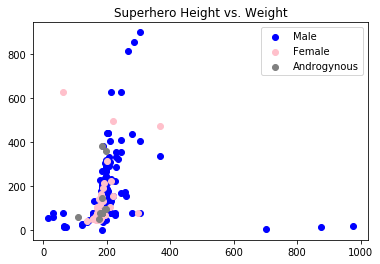

In [16]:
male_heroes_df = heroes_with_powers_df[heroes_with_powers_df['Gender']=='Male']
female_heroes_df = heroes_with_powers_df[heroes_with_powers_df['Gender']=='Female']
androgynous_gender_hero_df = heroes_with_powers_df[heroes_with_powers_df['Gender']=='ANDROGYNOUS'] 
plt.scatter(x=male_heroes_df['Height'], y=male_heroes_df['Weight'], c='blue', label="Male")
plt.scatter(x=female_heroes_df['Height'], y=female_heroes_df['Weight'], c='pink', label="Female")
plt.scatter(x=androgynous_gender_hero_df['Height'], y=androgynous_gender_hero_df['Weight'], c='gray', label="Androgynous")
plt.title("Superhero Height vs. Weight")
plt.legend()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [17]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    sns.distplot(heroes_with_powers_df.loc[heroes_with_powers_df['Gender']==gender, column_name]).set_title("Distribution of {} for Gender: {}".format(column_name, gender))

count     464.000000
mean      190.015086
median    183.000000
std        60.319926
max       975.000000
min        15.200000
Name: Height, dtype: float64

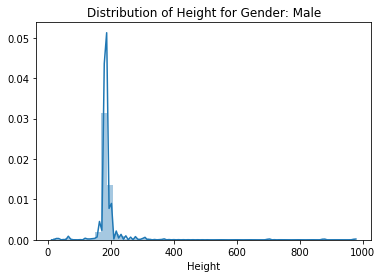

In [18]:
# Male Height
show_distplot(heroes_with_powers_df, 'Male', 'Height')
heroes_with_powers_df[heroes_with_powers_df['Gender']=='Male'].Height.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

count     464.000000
mean      112.829741
median     81.000000
std        96.580538
max       900.000000
min         2.000000
Name: Weight, dtype: float64

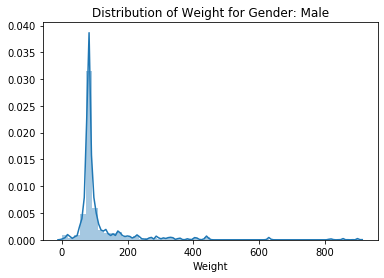

In [19]:
# Male Weight
show_distplot(heroes_with_powers_df, 'Male', 'Weight')
heroes_with_powers_df[heroes_with_powers_df['Gender']=='Male'].Weight.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

count     178.000000
mean      176.648876
median    175.000000
std        21.566387
max       366.000000
min        62.500000
Name: Height, dtype: float64

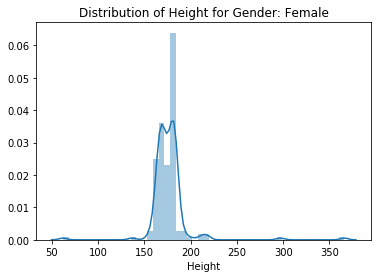

In [20]:
# Female Height
show_distplot(heroes_with_powers_df, 'Female', 'Height')
heroes_with_powers_df[heroes_with_powers_df['Gender']=='Female'].Height.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

count     178.000000
mean       80.134831
median     61.000000
std        68.581131
max       630.000000
min        41.000000
Name: Weight, dtype: float64

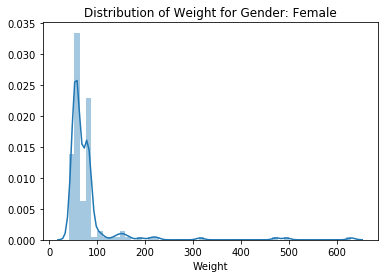

In [21]:
# Female Weight
show_distplot(heroes_with_powers_df, 'Female', 'Weight')
heroes_with_powers_df[heroes_with_powers_df['Gender']=='Female'].Weight.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

count      18.000000
mean      180.333333
median    183.000000
std        18.917779
max       198.000000
min       108.000000
Name: Height, dtype: float64

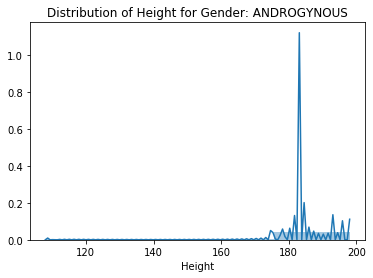

In [22]:
show_distplot(heroes_with_powers_df, 'ANDROGYNOUS', 'Height')
heroes_with_powers_df[heroes_with_powers_df['Gender']=='ANDROGYNOUS'].Height.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

count      18.000000
mean      115.888889
median     81.000000
std        95.068328
max       383.000000
min        50.000000
Name: Weight, dtype: float64

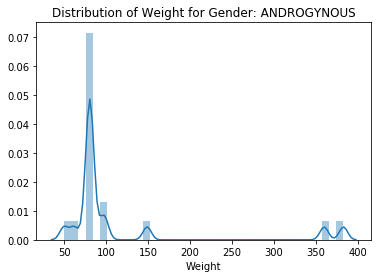

In [23]:
show_distplot(heroes_with_powers_df, 'ANDROGYNOUS', 'Weight')
heroes_with_powers_df[heroes_with_powers_df['Gender']=='ANDROGYNOUS'].Weight.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
Male height seems to be normally distributed but is skewed left, indicating there are a few observations occuring well above the central tendencies for this attribute (mean: ~190, median: ~183).  A max value of 975 was observed, which explains the left "skewness".  The same can be said, more or less, for male weight: though the specific values may differ (height vs. weight), the general character of the distribution does not.

Female height has a few negligible outliers on either side, so we do not see much skewness either way.  But, excluding those outliers, the distribution here seems to be locally skewed above average.  We might say that female superheroes tend to be on the tall side on average.  The same cannot be said for female weight observations.  There are some outliers which skew the distribution to the left, but, excluding them we see that the distribution is more or less locally normal.

The most interesting information is provided by height and weight measures for "androgynous" superheroes.  But, since the number of observations is relatively low (18 out of 660 total), these metrics may not be that reliable when compared to a larger sample in this category.  Nevertheless, the observations that did occur are interesting: height is skewed far to the right but the min and max values of height are observed in a tighter range, so maybe not.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [24]:
grouped = heroes_with_powers_df.groupby(['Publisher', 'Gender'])
grouped_df = grouped.sum()
grouped_df

Height   Weight  Agility  Accelerated Healing  \
Publisher         Gender                                                        
ABC Studios       Female         366.0    162.0      0.0                  1.0   
                  Male           366.0    162.0      0.0                  0.0   
DC Comics         ANDROGYNOUS    183.0     81.0      0.0                  0.0   
                  Female        9352.5   4243.0     20.0                 12.0   
                  Male         26057.0  14743.0     51.0                 39.0   
Dark Horse Comics Female         828.0    379.0      3.0                  2.0   
                  Male          2399.0   1588.0      6.0                  6.0   
George Lucas      Female         297.0     81.0      1.0                  0.0   
                  Male          2093.0    954.0      8.0                  3.0   
Hanna-Barbera     Male           183.0     81.0      1.0                  0.0   
HarperCollins     Female         183.0     81.0      0.0                  0.0   
                  Male           366.0    162.0      0.0                  0.0   
IDW Publishing    Male           732.0    324.0      4.0                  4.0   
Icon Comics       Female         183.0     81.0      1.0                  0.0   
                  Male           549.0    243.0      2.0                  0.0   
Image Comics      ANDROGYNOUS    183.0     81.0      0.0                  1.0   
                  Female         366.0    162.0      0.0                  1.0   
                  Male          2041.0   1215.0      1.0                  1.0   
J. K. Rowling     Male           183.0     81.0      1.0                  1.0   
J. R. R. Tolkien  Male           279.0     81.0      0.0                  1.0   
Marvel Comics     ANDROGYNOUS   2772.0   1862.0      4.0                  4.0   
                  Female       17497.0   8047.0     38.0                 21.0   
                  Male         44673.5  29091.0     84.0                 75.0   
Microsoft         Male           213.0     81.0      1.0                  1.0   
NBC - Heroes      Female        1098.0    486.0      0.0                  1.0   
                  Male          2196.0    972.0      0.0                  1.0   
Rebellion         Male           188.0     81.0      1.0                  0.0   
Shueisha          Male           686.0    258.0      4.0                  3.0   
Sony Pictures     Male           188.0     81.0      1.0                  1.0   
South Park        Male           183.0     81.0      0.0                  0.0   
Star Trek         Female         183.0     81.0      0.0                  0.0   
                  Male           912.0    401.0      1.0                  0.0   
SyFy              Female         366.0    162.0      0.0                  0.0   
                  Male           549.0    243.0      0.0                  0.0   
Team Epic TV      Female         175.0     56.0      1.0                  0.0   
                  Male           736.0    313.0      1.0                  1.0   
Titan Books       Male           183.0     81.0      0.0                  0.0   
UNKNOWN           ANDROGYNOUS    108.0     62.0      1.0                  0.0   
                  Female         366.0    162.0      2.0                  0.0   
                  Male          1662.5    793.0      5.0                  0.0   
Universal Studios Male           183.0     81.0      0.0                  0.0   
Wildstorm         Female         183.0     81.0      0.0                  0.0   
                  Male           366.0    162.0      1.0                  1.0   

                               Lantern Power Ring  Dimensional Awareness  \
Publisher         Gender                                                   
ABC Studios       Female                      0.0                    0.0   
                  Male                        0.0                    0.0   
DC Comics         ANDROGYNOUS                 0.0                    0.0   
      

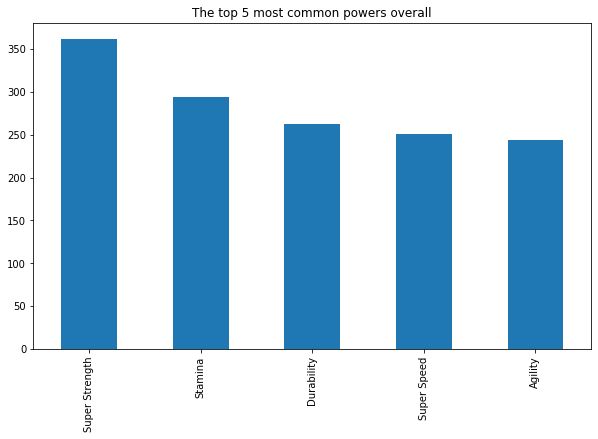

In [25]:
overall_power_counts = grouped_df.sum()[2:].sort_values(ascending=False)
overall_power_counts[:5].plot(kind='bar', figsize=(10,6), title="The top 5 most common powers overall")

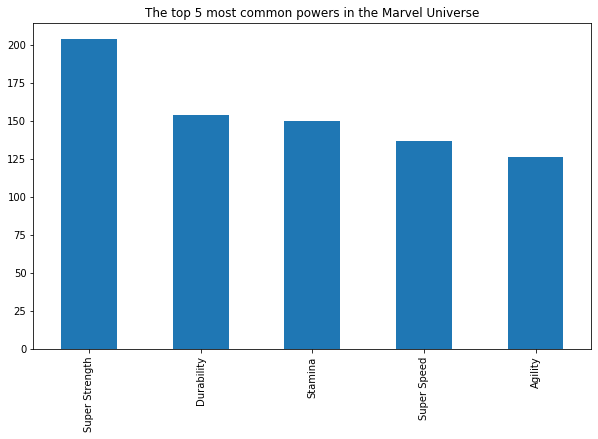

In [26]:
grouped_df_unstacked = grouped_df.reset_index()

marvel_power_counts = grouped_df_unstacked[grouped_df_unstacked['Publisher']=='Marvel Comics'].sum()[4:].sort_values(ascending=False)
marvel_power_counts[:5].plot(kind='bar', figsize=(10,6), title="The top 5 most common powers in the Marvel Universe")

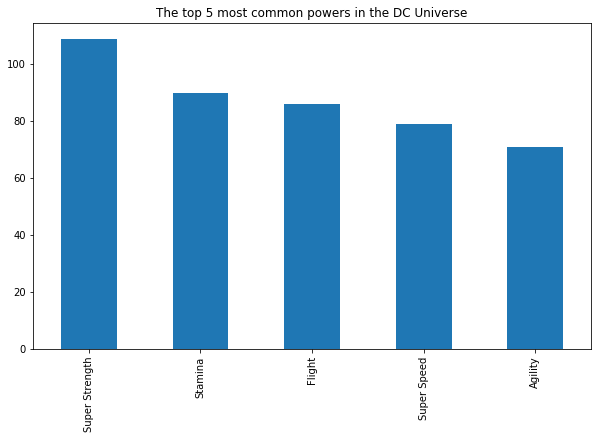

In [27]:
dc_power_counts = grouped_df_unstacked[grouped_df_unstacked['Publisher']=='DC Comics'].sum()[4:].sort_values(ascending=False)
dc_power_counts[:5].plot(kind='bar', figsize=(10,6), title="The top 5 most common powers in the DC Universe")

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
The top 5 powers in both universes are eerily similar, with the distribution at the top differing only in the second and third more common powers, wherein Marvel has Durability as its second most common power.  Durability is not found in the top 5 in DC universe.  On the other hand, Marvel has Stamina in the third postion, while DC has it in the second position.  DC has Flight in the third postion, while this power is not found in the top 5 in the Marvel case.  Overall both universes have 4 out of 5 powers in common in the top 5 and their frequency is identical with the exceptions noted above.  Relative to the top 5 powers overall, Marvel agrees in positions 1, 4, and 5.  Marvel also intersets with top 5 overall in all 5 powers!  Marvel differs from the top 5 overall only in positions 2 and 3 where those values are transposed (from overall).  On the other hand, DC intersects with top 5 observed overall in 4 out of 5 occurrences.  Again, DC differs from overall in postions 2 and 3.  However, DC has 4 out of 5 positions that agree with overall.  In the third position, DC has Flight while this power is not observed at all in the top 5 overall.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
I chose to investigate the distribution of skin colors amongst alient heroes, by gender.


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [28]:
alien_heroes_with_powers_df = heroes_with_powers_df[heroes_with_powers_df['Race'] != 'Human']
alien_heroes_with_powers_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NOT SPECIFIED,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,NOT SPECIFIED,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,Male,blue,NOT SPECIFIED,Blond,183.0,NBC - Heroes,NOT SPECIFIED,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,NOT SPECIFIED,good,50.0,True,...,False,False,False,False,False,False,False,False,False,False
X-Man,Male,blue,NOT SPECIFIED,Brown,175.0,Marvel Comics,NOT SPECIFIED,good,61.0,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False


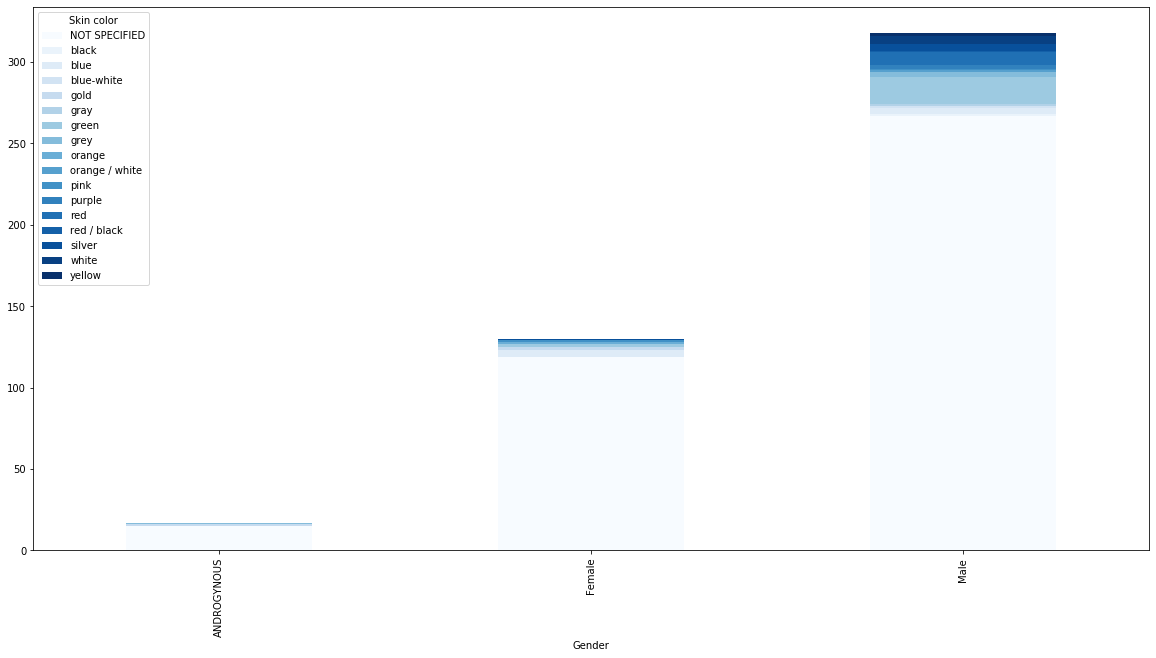

In [66]:
aliens_grouped_by_gender = alien_heroes_with_powers_df.groupby('Gender')['Skin color'].value_counts()
aliens_grouped_by_gender.unstack().plot(kind='bar', stacked=True,  colormap='Blues', figsize=(20,10))

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data